# k-Nearest Neighbors

In [1]:
import warnings
warnings.filterwarnings('ignore')
%autosave 5

Autosaving every 5 seconds


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

# Import iris data
iris = datasets.load_iris()

In [3]:
# Create dataframe to store iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Import estimator
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)   # setting random seed for reproducibility

# Create an instance of the estimator
flower_classifier = KNeighborsClassifier(n_neighbors=3)

In [5]:
# Train our model
flower_classifier.fit(X=iris.data, y=iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [6]:
# Store measurements of new flowers in two-dimensional arrays
new_flower1 = np.array([[5.1, 3.0, 1.1, 0.5]])
new_flower2 = np.array([[6.0, 2.9, 4.5, 1.1]])

In [7]:
# Make predictions
new_flower_pred1 = flower_classifier.predict(new_flower1)
new_flower_pred2 = flower_classifier.predict(new_flower2)

print(f'Predicted species of new_flower1: {new_flower_pred1}')
print(f'Predicted species of new_flower2: {new_flower_pred2}')

Predicted species of new_flower1: [0]
Predicted species of new_flower2: [1]


In [8]:
# Make more predictions
new_flowers = np.array([[5.5, 2.1, 2.0, 0.9],
                        [7.2, 3.8, 9.0, 1.9]])

new_flowers_pred = flower_classifier.predict(new_flowers)

print(f'Predicted species of new flowers: {new_flowers_pred}')

Predicted species of new flowers: [0 2]


In [9]:
# TASK --- Predict species of new flowers


# Logistic Regression

In [10]:
# Import data
data = pd.read_csv('student_alc.csv')

# Show first five rows
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Low
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Low


In [11]:
# Store features and target variables as list
features = ['sex', 'famsize', 'age', 'studytime', 'famrel', 'goout', 'freetime', 'G3']
target = 'alc'

In [12]:
# One-hot encode categorical variables
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['famsize'] = data['famsize'].map({'LE3': 0, 'GT3': 1})
data['alc'] = data['alc'].map({'Low': 0, 'High': 1})

In [13]:
# Save feature and target values into X and y
X = data[features].values
y = data[target].values

In [14]:
# Calculate a benchmark
data['alc'].value_counts(normalize=True)

0    0.744222
1    0.255778
Name: alc, dtype: float64

In [15]:
# Import necessary model
from sklearn.linear_model import LogisticRegression
np.random.seed(0)   # setting random seed for reproducibility

# Create instance of Logistic Regression object
student_classifier_logreg = LogisticRegression(C=2, solver='liblinear')

# Train logistic regression model
student_classifier_logreg.fit(X, y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Store predictions in new column in DataFrame
data['predictions_logreg'] = student_classifier_logreg.predict(X)

# Create confusion matrix
conf_matrix = pd.crosstab(data['predictions_logreg'], data['alc'])
conf_matrix

alc,0,1
predictions_logreg,,
0,453,105
1,30,61


In [ ]:
# Calculate accuracy from confusion matrix
accuracy = (conf_matrix.iloc[0, 0] + conf_matrix.iloc[1, 1]) / data.shape[0]

print(f"The model's accuracy was {(accuracy * 100):.4f}%")

# Random Forests

In [17]:
# Import RandomForestClassifier object
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)   # setting random seed for reproducibility

In [19]:
# TASK --- Create instance of object and train random forest model
student_classifier_rf = RandomForestClassifier()
student_classifier_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
# Store predictions in new column in DataFrame
data['predictions_rf'] = student_classifier_rf.predict(X)

# Create confusion matrix
conf_matrix = pd.crosstab(data['predictions_rf'], data['alc'])
conf_matrix

alc,0,1
predictions_rf,,
0,481,16
1,2,150


In [21]:
# TASK --- Calculate accuracy
accuracy = (conf_matrix.iloc[0, 0] + conf_matrix.iloc[1, 1]) / data.shape[0]

print(f"The model's accuracy was {(accuracy * 100):.4f}%")

The model's accuracy was 97.2265%


In [22]:
# Features: [gender, famsize, age, studytime, famrel, goout, freetime, G3]
new_student1 = np.array([[1, 1, 18, 2, 1, 5, 5, 10]])

# Make prediction
new_student1_pred = student_classifier_rf.predict(new_student1)

# Decode prediction
def decode(prediction):
    """
    Return 'High' if prediction is '1'
    Return 'Low' if prediction is '0'.
    """
    if prediction == 1:
        return('High')
    else:
        return('Low')

decode(new_student1_pred)

'High'

In [27]:
# New students!
new_student2 = np.array([[0, 1, 19, 5, 5, 1, 1, 18]])
new_student3 = np.array([[1, 0, 17, 2, 0, 3, 1, 8]])

In [28]:
# TASK --- Predictions alcohol consumption level for new_student2
new_student2_pred = student_classifier_rf.predict(new_student2)
decode(new_student2_pred)

'Low'

In [30]:
# TASK --- Predictions alcohol consumption level for new_student3
new_student3_pred = student_classifier_rf.predict(new_student3)
decode(new_student3_pred)

'High'

# Linear Regression

In [36]:
# Import data
housing = pd.read_csv('house.csv')

# Create 'Age' variable as in 'EDA with `seaborn`' lesson
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

# Show first five rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [37]:
# Remove neighborhoods with less than 30 observations
counts = housing['Neighborhood'].value_counts()
housing = housing.loc[housing['Neighborhood'].isin(counts[counts > 30].index)]

housing.shape

(1310, 82)

In [38]:
# Store feature and target variables
features = ['CentralAir', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'Age']
target = 'SalePrice'

In [39]:
# One-hot encode CentralAir
housing['CentralAir'] = housing['CentralAir'].map({'N':0, 'Y':1})

In [40]:
# One-hot encode Neighborhood
dummies_nb = pd.get_dummies(housing['Neighborhood'])
dummies_nb.head()

,BrkSide,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Timber
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [52]:
# Compare dummy variables to original neighborhood data
housing['Neighborhood'].head()

0    CollgCr
2    CollgCr
3    Crawfor
4    NoRidge
5    Mitchel
Name: Neighborhood, dtype: object

In [54]:
# Join dummy variables to original dataset
housing = pd.concat([housing, dummies_nb], axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Timber
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0


In [43]:
# Add dummy variables to feature list
features += list(dummies_nb.columns)
features

['CentralAir',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'Age',
 'BrkSide',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'Mitchel',
 'NAmes',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'Timber']

In [46]:
# Store features, target, and number of observations
X = housing[features].values
y = housing[target].values
n = housing.shape[0]
X

array([[    1,  8450,     7, ...,     0,     0,     0],
       [    1, 11250,     7, ...,     0,     0,     0],
       [    1,  9550,     7, ...,     0,     0,     0],
       ...,
       [    1,  9042,     7, ...,     0,     0,     0],
       [    1,  9717,     5, ...,     0,     0,     0],
       [    1,  9937,     5, ...,     0,     0,     0]], dtype=int64)

In [47]:
# Calculate mean sale price for benchmark
y_mean = np.mean(y)
y_mean

180167.63358778626

In [55]:
# Calculate benchmark RMSE
RMSE_benchmark = np.sqrt(np.sum((y - y_mean)**2) / n)
RMSE_benchmark

78032.94485454109

In [56]:
# Build linear regression model
from sklearn.linear_model import LinearRegression
np.random.seed(0)   # setting random seed for reproducibility

lr = LinearRegression()
lr.fit(X, y)

# Make predictions
housing['predictions'] = lr.predict(X)
y_pred = housing['predictions'].values

In [57]:
# Calculate RMSE for linear regression model
RMSE_lr = np.sqrt(np.sum((y - y_pred)**2) / n)
RMSE_lr

33729.21817336611

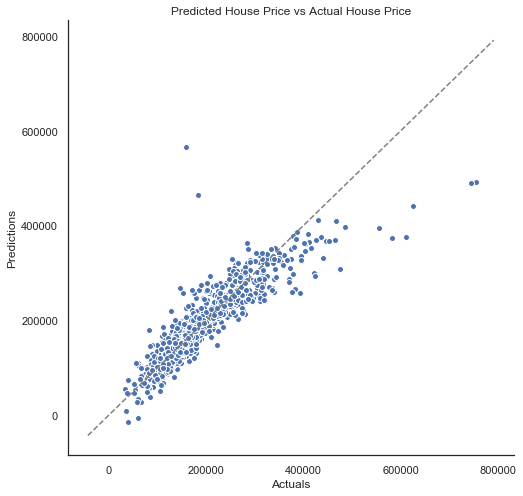

In [58]:
# Create scatter to compare predictions to actual sale prices
## Set style
sns.set(style='white', palette='deep', rc={'figure.figsize':[8, 8]})

## Plot scatterplot for predictions and actual prices
fig, ax = plt.subplots()
ax.scatter(x=housing['SalePrice'], y=housing['predictions'], edgecolor='white')
ax.set_title('Predicted House Price vs Actual House Price')
ax.set_xlabel('Actuals')
ax.set_ylabel('Predictions')

## Plot gray dotted diagonal line (where markers should lie if predictions = actual)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),   # find min limits of figure
    np.max([ax.get_xlim(), ax.get_ylim()])    # find max limits of figure
]
ax.plot(lims, lims, color='0.5', linestyle='--')

## Remove top and right spines
sns.despine()
plt.show()

In [ ]:
# TASK --- Predict price of new_house1
## Remember, features are ['CentralAir', 'LotArea', 'OverallQual', 'OverallCond',
## '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'Age', 'Neighborhood']


In [ ]:
# TASK --- Predict price of new_house2
